In [1]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
import numpy as np 
from tensorflow.keras.layers import Conv2D,Input,Dense,Dropout,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt 

Fashion MNIST 28 x 28 grayscale images of different types of clothings like shirts, t shirts, pants, etc.

Task: Classification.

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
fashion_mnist = fashion_mnist

In [5]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# Standardization, apply scaling
x_train, x_test = x_train /255.0, x_test/255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

x_train.shape is N x H x W CNN requires a shape N x H x W x C.

Therefore we need to add a superfluous layers.

In [10]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [13]:
#Number of classes(Outputs in our Fashion_mnist Dataset):
K = len(set(y_train))
print('Number of Classes:', K)

Number of Classes: 10


We will be using the Functional API, as:

a. Code looks cleaner and compact

b. It allows us to create branches.

c. It allows us to define model that can have multiple inputs and outputs.

In [14]:
x_train[0].shape

(28, 28, 1)

In [18]:
# Building our model using Functional API:
i = Input(shape= x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i) #Addiing Convolution Layers to our CNN.
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x) #Flattening the O/P of our convolution layers to 2D as our NN takes 2D as an i/p 
x = Dropout(0.4)(x)
# Designing our Dense layers for NN:
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(K, activation='softmax')(x) #output Layer

# Once we have the variable representing the input "i"
# and the variable representing the output "x",
# we can pass these into the Model() constructor

model = Model(i,x)

In [21]:
# Compiling and fiting to our model:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.4027 - acc: 0.8494 - val_loss: 0.4107 - val_acc: 0.8414
Epoch 2/15
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.3509 - acc: 0.8681 - val_loss: 0.3332 - val_acc: 0.8767
Epoch 3/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.3171 - acc: 0.8807 - val_loss: 0.3101 - val_acc: 0.8872
Epoch 4/15
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2954 - acc: 0.8892 - val_loss: 0.3273 - val_acc: 0.8758
Epoch 5/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2787 - acc: 0.8953 - val_loss: 0.2992 - val_acc: 0.8904
Epoch 6/15
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.2628 - acc: 0.9012 - val_loss: 0.2948 - val_acc: 0.8925
Epoch 7/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2489 - acc: 0.9060 - val_loss: 0.

**Observation: We are getting a decent Training and Testing data based accuracy.**

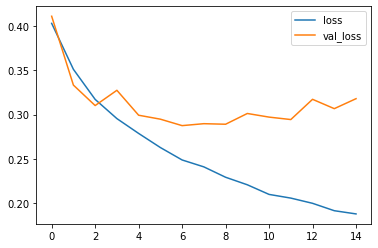

In [22]:
# Plotting Loss Per Iteration:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

**Obesrvation: We see the convergence for validation loss to a decent extent though our model is slighly overfitting but the accuracy of our model is appreciable.**

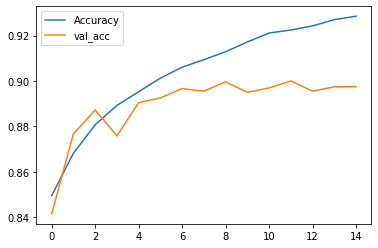

In [23]:
# Plotting Accuracy Per Iteration:
plt.plot(r.history['acc'], label='Accuracy')
plt.plot(r.history['val_acc'], label = 'val_acc')
plt.legend()

**Obesrvation: As we see our Training accuracy is on the way to reach its peak also the testing accuracy is becoming stangnant, thus we infer that our model is becoming slightly confident in making wrong predictions.**

C:\Users\Akshay\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Akshay\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Akshay\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Confusion matrix, without normalization
[[859   0  28  14   1   1  87   0  10   0]
 [  4 975   0  10   3   0   6   0   2   0]
 [ 15   0 873  13  44   0  54   0   1   0]
 [ 15   5  23 917  12   1  23   0   4   0]
 [  1   0  72  42 796   0  89   0   0   0]
 [  0   0   0   0   0 979   0  16   0   5]
 [118   1  76  22  70   1 692   0  20   0]
 [  0   0   0   0   0  17   0 966   1  16]
 [  2   1   2   2   2   3   4   4 979   1]
 [  1   0   0   0   0   6   0  54   0 939]]


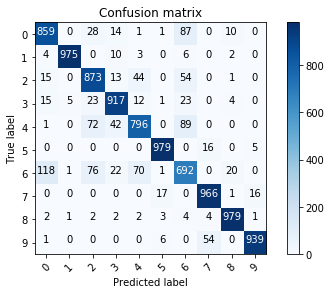

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [25]:
#Label Mapping:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'True Label:Pullover Predicted Label:Bag')

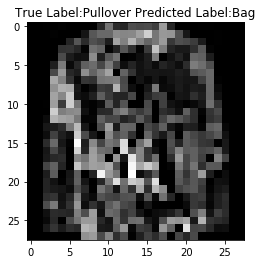

In [26]:
# Show Missclassified examples:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True Label:%s Predicted Label:%s' %(labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True Label:Shirt Predicted Label:Coat')

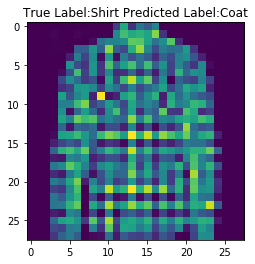

In [27]:
# Show Missclassified examples:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28))
plt.title('True Label:%s Predicted Label:%s' %(labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True Label:Dress Predicted Label:Bag')

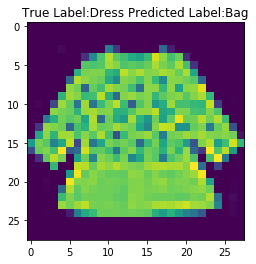

In [28]:
# Show Missclassified examples:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28))
plt.title('True Label:%s Predicted Label:%s' %(labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True Label:Dress Predicted Label:Shirt')

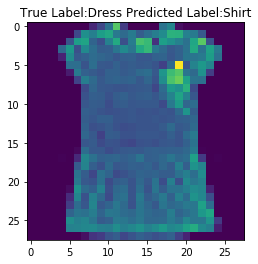

In [29]:
# Show Missclassified examples:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28))
plt.title('True Label:%s Predicted Label:%s' %(labels[y_test[i]], labels[p_test[i]]))